# JUPYTER NOTEBOOK FOR HOMEWORK 2
Segment the foreground from one image and transfer it to another image

In [60]:
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt 
from scipy.ndimage.filters import convolve
from sklearn.cluster import KMeans
from makeLMfilters import makeLMfilters

In [225]:
#   Define a function segmentImg which takes in an image and returns the foreground labels
#   The arguments to segmentImg are imgFilename
#   and k (the number of clusters)
def segmentImg(imgFilename, k):
    #1. Load and display the image from which you want to segment the foreground from the background
    #  Make sure to convert your image to grayscale after loading
    img = skimage.io.imread(imgFilename, as_gray = True)
    plt.imshow(img)
    plt.show()
    x, y = img.shape
    
    #2. Create an overcomplete bank of filters F (make sure you check the dimensions of the returned array)
    F = makeLMfilters()

    #3. Convolve the input image with every filter in the bank of filters 
    #   to get a response array 
    response = np.zeros([x, y, 48])
    for i in range(48):
        filters = F[:,:,i]
        response[:,:,i] = convolve(img, filters)
  
    
    #4.Take the absolute values of the responses and 
    #  reshape the reponse tensor into a matrix of size [row*cols, num_filters]
    response = np.absolute(responsearray)
    response = responsearray.reshape(-1, 48)
    
    #5. Run k-means on the vectorized reponses X to get a vector of labels (the clusters); 
    kmeans = KMeans(k)
    kmeans.fit(response)
    labels = kmeans.labels_

    
    #6. Reshape the label results of k-means so that it has the same size as the input image
    #   Return the label image which we call idx
    idx = labels.reshape(x,y)
    plt.imshow(idx)
    plt.show()
    print('***Segmentation done***')
    return idx
    

In [226]:
"""
You are now given a second function tansferImg with the arguments:
    fgs: foreground label ids from clustering
    idxImg: the reshaped indexed image also from clustering
    sImgFilename: source image (a color image to pick pixels from)
    tImgFilename: target image (also a color image to transfer pixels to)
    This function is customized to work for the images provided for the homework
"""
def transferImg(fgs, idxImg, sImgFilename, tImgFilename):

    # Read the images, estimate their dimensions
    sImg = skimage.io.imread(sImgFilename)
    tImg = skimage.io.imread(tImgFilename)
    rows, cols, clrs = sImg.shape

    # Crop the source and indexed images
    idxImg = idxImg[25:rows-25, 25:cols-25]
    sImg = sImg[25:rows-25, 25:cols-25]
    rows, cols, clrs = sImg.shape
    
    # Resize them by so they fit in target file, tImg
    idxImg = np.uint8(idxImg)
    idxImg = 255*resize(idxImg,(int(idxImg.shape[0]/1.5), int(idxImg.shape[1]/1.5)),anti_aliasing=True)
    idxImg = idxImg.astype(np.uint8)
    sImg = 255*resize(sImg, (int(sImg.shape[0]/1.5), int(sImg.shape[1]/1.5)), anti_aliasing=True)
    sImg = sImg.astype(np.uint8)
    rows, cols, clrs = sImg.shape
    
    # Transfer idx onto tImg
    for i in range(rows): 
        for j in range(cols):
            if idxImg[i,j] in fgs:
                # Coordinate offsets from boundary
                iOff = i+100
                jOff = j+200 
                tImg[iOff,jOff,0] = sImg[i,j,0]
                tImg[iOff,jOff,1] = sImg[i,j,1]
                tImg[iOff,jOff,2] = sImg[i,j,2]

    print('***transfer done')
    plt.imshow(tImg)
    plt.show()
    return tImg


***transfer done


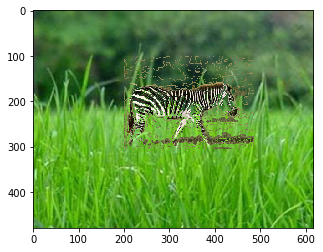

In [218]:
#7. Test your segmentation function with an image file and # of clusters, k
# Below is an example of how to call the transfer function
#

idx = segmentImg('images/zebra.jpg', 6)
# Insert only the numbers that correspond to the foreground labels in the transferImg function
trImg = transferImg([1,3,4], idx, 'images/zebra.jpg', 'images/bg3.jpg')

In [77]:
#8. Write a new function segmentImgClr with the same arguments as segmentImg
#   But this time, instead of features based on filter responses, just use color
#   Try different colorspaces
def segmentImgClrlab(imgFilename, k):
    img = skimage.io.imread(imgFilename)
    x, y, z = img.shape
    lab = skimage.color.rgb2lab(img)
    lab = lab.reshape(-1, 3)
    
    kmeans = KMeans(k)
    kmeans.fit(lab)
    labels = kmeans.labels_
    
    idx = labels.reshape(x,y)
    plt.imshow(idx)
    plt.show()
    
    print('***Segmentation done***')
    return idx

def segmentImgClrhsv(imgFilename, k):
    img = skimage.io.imread(imgFilename)
    x, y, z = img.shape
    hsv = skimage.color.rgb2hsv(img)
    hsv = hsv.reshape(-1, 3)
    
    kmeans = KMeans(k)
    kmeans.fit(hsv)
    labels = kmeans.labels_
    
    idx = labels.reshape(x,y)
    plt.imshow(idx)
    plt.show()
    
    print('***Segmentation done***')
    return idx

def segmentImgClrrgb(imgFilename, k):
    img = skimage.io.imread(imgFilename)
    x, y, z = img.shape
    img = img.reshape(-1, 3)
    
    kmeans = KMeans(k)
    kmeans.fit(img)
    labels = kmeans.labels_
    
    idx = labels.reshape(x,y)
    plt.imshow(idx)
    plt.show()
    
    print('***Segmentation done***')
    return idx

/Users/aditimunjekar/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]


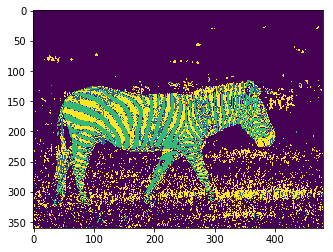

***Segmentation done***


/Users/aditimunjekar/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


***transfer done


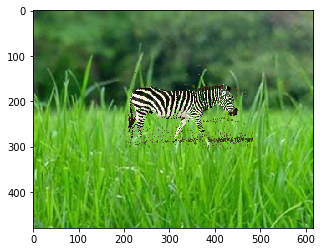

In [219]:
#9. Again test your new color-based segmentation function
#   The same transferImg function should work here also.
idx = segmentImgClrhsv('images/zebra.jpg', 4)
trImg = transferImg([1,2,3], idx, 'images/zebra.jpg', 'images/bg3.jpg')#with HSV

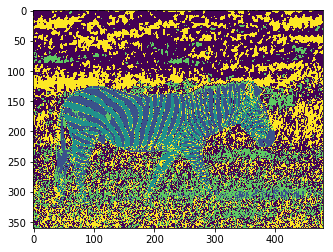

***Segmentation done***


/Users/aditimunjekar/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


***transfer done


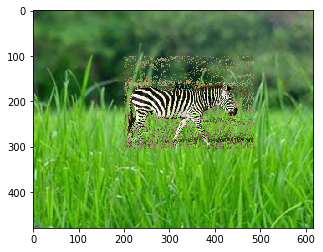

In [222]:
#10 Test with a different colorspace
idx = segmentImgClrrgb('images/zebra.jpg', 5)
trImg = transferImg([1,2,4], idx, 'images/zebra.jpg', 'images/bg3.jpg')#with RGB


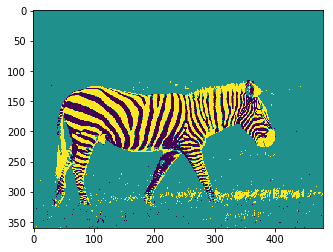

***Segmentation done***


/Users/aditimunjekar/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


***transfer done


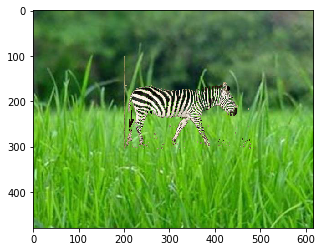

In [224]:
#9. Again test your new color-based segmentation function
#   The same transferImg function should work here also.
idx = segmentImgClrlab('images/zebra.jpg', 3)
trImg = transferImg([0,2], idx, 'images/zebra.jpg', 'images/bg3.jpg')#with Lab